# Exercício 2
**Nome:** Erick         **Ra.** \
**Nome:** Gabriel       **Ra.** 240254
## Importando depedências

In [1]:
import torch as t
import random
import numpy as np
import matplotlib.pyplot as plt
import json
import tqdm
import Rede_neural as rn
import time as tm
import Treinamenro_de_rede_show as tr
import sys

## Definindo os parâmetros de treinamento
 - Estamos utilizando como a média dos quadrados dos desvios obtidos para cada caso de treinamento utilizando a função torch.nn.MSELoss() 
 - O treinamento foi feito em batchs com todos os casos de treinamento
 - O otimizador utilizado foi o Adam
 - Os pesos da rede foram adotados na situação onde a perda dos dados de validação (não extrapolação) é mínima

In [2]:
#função
func = lambda x_1,x_2: 3*(1-x_1)**2*np.exp(-x_1**2 - (x_2 + 1)**2) - 10*(x_1/5 - x_1**3 - x_2**5)*np.exp(-x_1**2 - x_2**2) - 1/3*np.exp(-(x_1 + 1)**2 - x_2**2)
#amostras 
number_samples = 20
xa, xb = -4, 4
t.manual_seed(0)

input_size = 2
output_size = 1

x_train = xa + (xb-xa) * t.rand(number_samples, input_size)
x_val = xa + (xb-xa) * t.rand(number_samples, input_size)

y_train = func(x_train[:,0], x_train[:,1])
y_val = func(x_val[:,0], x_val[:,1])

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24180\3092620885.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  func = lambda x_1,x_2: 3*(1-x_1)**2*np.exp(-x_1**2 - (x_2 + 1)**2) - 10*(x_1/5 - x_1**3 - x_2**5)*np.exp(-x_1**2 - x_2**2) - 1/3*np.exp(-(x_1 + 1)**2 - x_2**2)


## Melhor rede para o problema
Testando para todas as redes que são compostas considerando o número de camadas nas camadas internas de 5, 10, 15, 20, 25 e 30 para com até 3 camadas e os resultados de um método adpatado do método da secante, se encontrou como melhor rede a rede com a função de ativação RELU e 30 neuronios na 1ª camada, 5 na 2ª camada e 15 na 3ª camada. O melhor resultado para as redes com funções de ativação Sigmoid e Tanh se deram com respectivamente: 19 neuronios na 1ª camada, 26 na 2ª camada e 37 na 3ª camada; e 30 neuronios na 1ª camada, 15 na 2ª camada e 5 na 3ª camada (considerado como o número máximo de neuronios para a análise pelo método iterativo)
### Rede RELU com 30 neuronios na 1ª camada, 5 na 2ª camada e 15 na 3ª camada (Melhor)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24180\3092620885.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  func = lambda x_1,x_2: 3*(1-x_1)**2*np.exp(-x_1**2 - (x_2 + 1)**2) - 10*(x_1/5 - x_1**3 - x_2**5)*np.exp(-x_1**2 - x_2**2) - 1/3*np.exp(-(x_1 + 1)**2 - x_2**2)


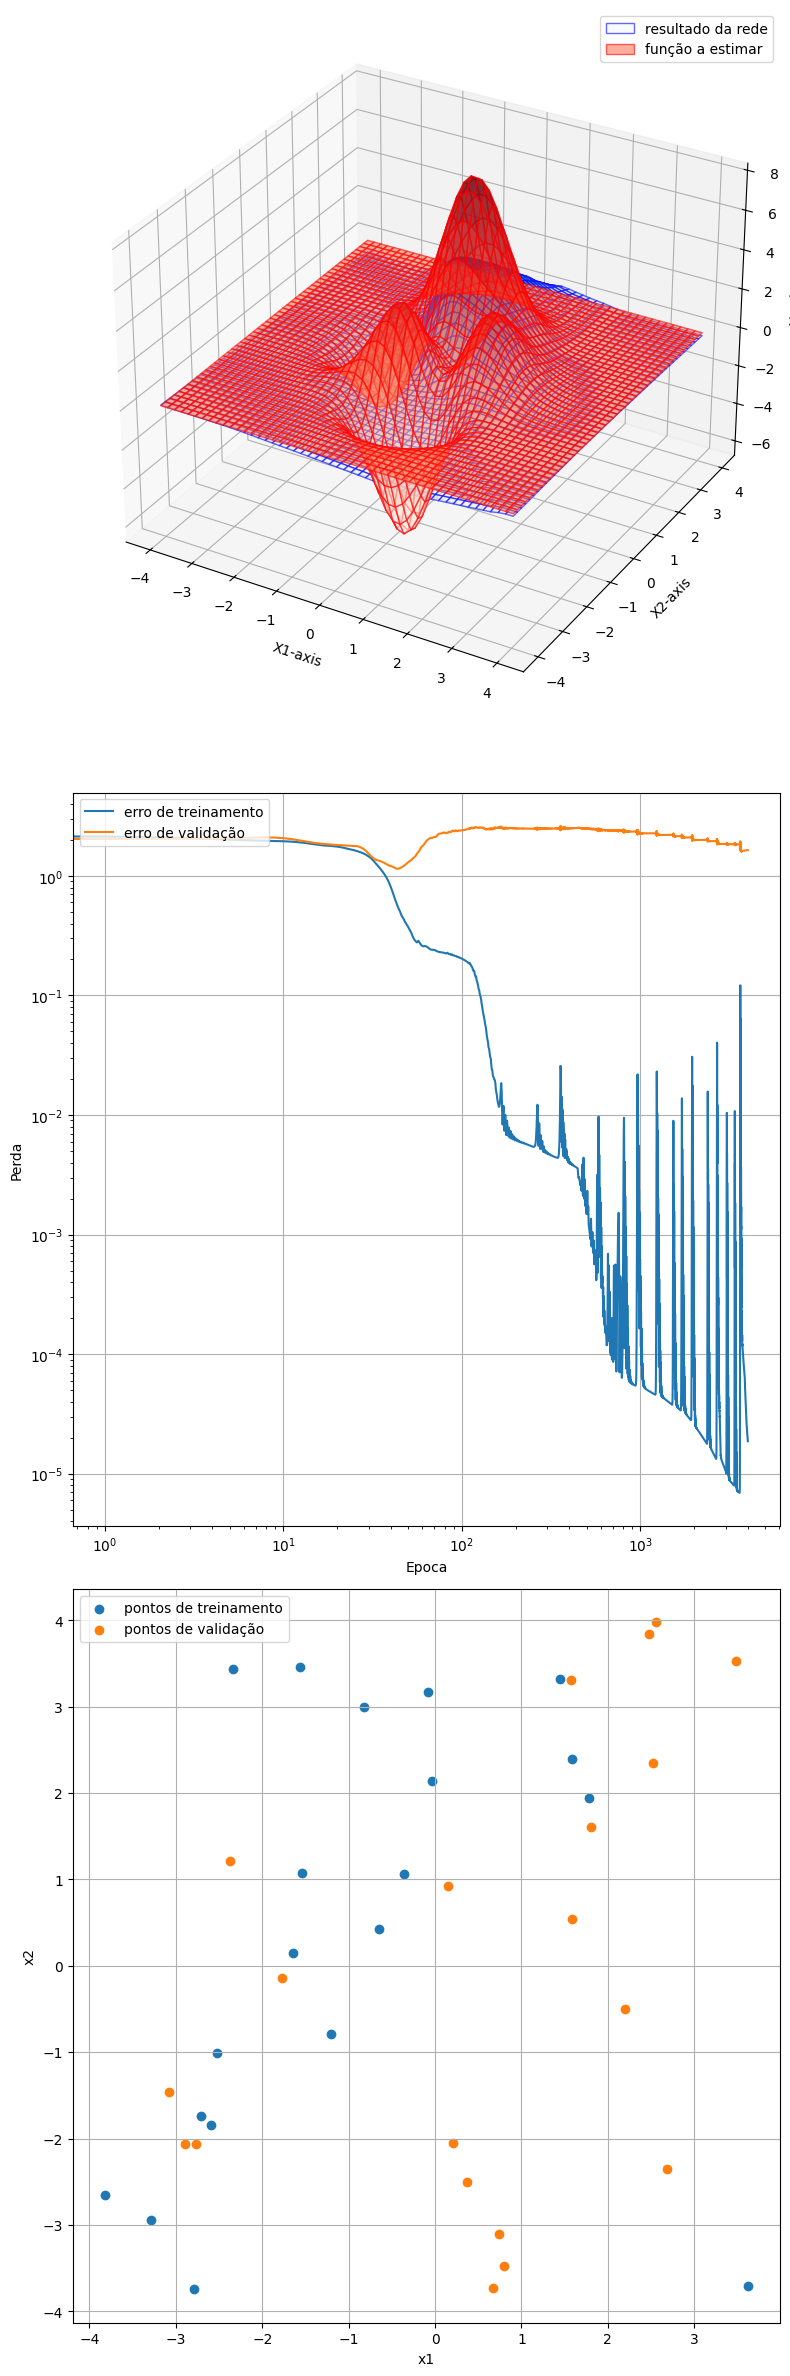

perda estimada = 1.1487863063812256


In [3]:
# função de ativação
activation_func = "ReLU"

# número de neuronios
neuronios = [30, 5, 15]

# processamento da rede e plotagem das funções
loss_val_min = tr.processamento_agrupado_2d(rn.neural_net_interno_3_hidden, neuronios, activation_func, x_train, y_train, x_val, y_val, func, xa, xb)

# printando preda mínima dos dados de validação
print(f"perda estimada = {loss_val_min}")


### Rede Sigmoid com 19 neuronios na 1ª camada, 26 na 2ª camada e 37 na 3ª camada

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24180\3092620885.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  func = lambda x_1,x_2: 3*(1-x_1)**2*np.exp(-x_1**2 - (x_2 + 1)**2) - 10*(x_1/5 - x_1**3 - x_2**5)*np.exp(-x_1**2 - x_2**2) - 1/3*np.exp(-(x_1 + 1)**2 - x_2**2)


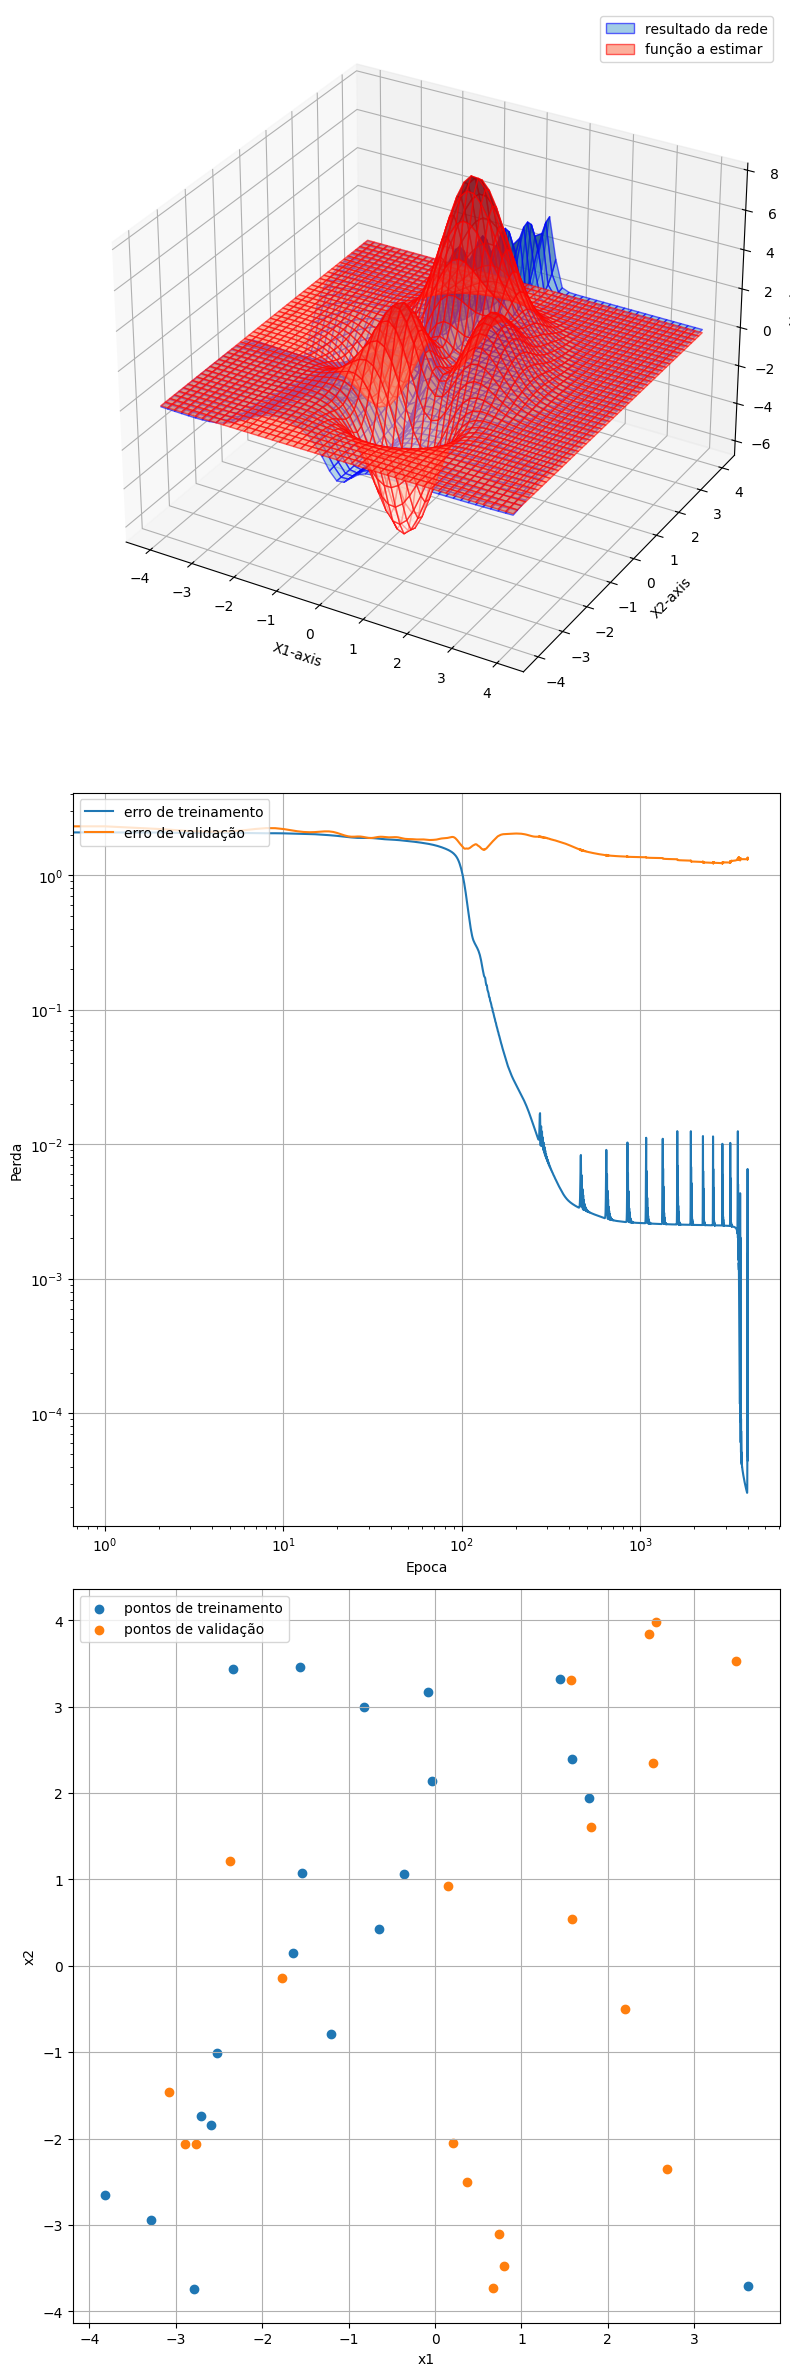

perda estimada = 1.2236533164978027


In [4]:
# função de ativação
activation_func = "sigmoid"

# número de neuronios
neuronios = [19,26,37]

# processamento da rede e plotagem das funções
loss_val_min = tr.processamento_agrupado_2d(rn.neural_net_interno_3_hidden, neuronios, activation_func, x_train, y_train, x_val, y_val, func, xa, xb)

# printando preda mínima dos dados de validação
print(f"perda estimada = {loss_val_min}")

### Rede Tanh com 30 neuronios na 1ª camada, 15 na 2ª camada e 5 na 3ª camada

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_24180\3092620885.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  func = lambda x_1,x_2: 3*(1-x_1)**2*np.exp(-x_1**2 - (x_2 + 1)**2) - 10*(x_1/5 - x_1**3 - x_2**5)*np.exp(-x_1**2 - x_2**2) - 1/3*np.exp(-(x_1 + 1)**2 - x_2**2)


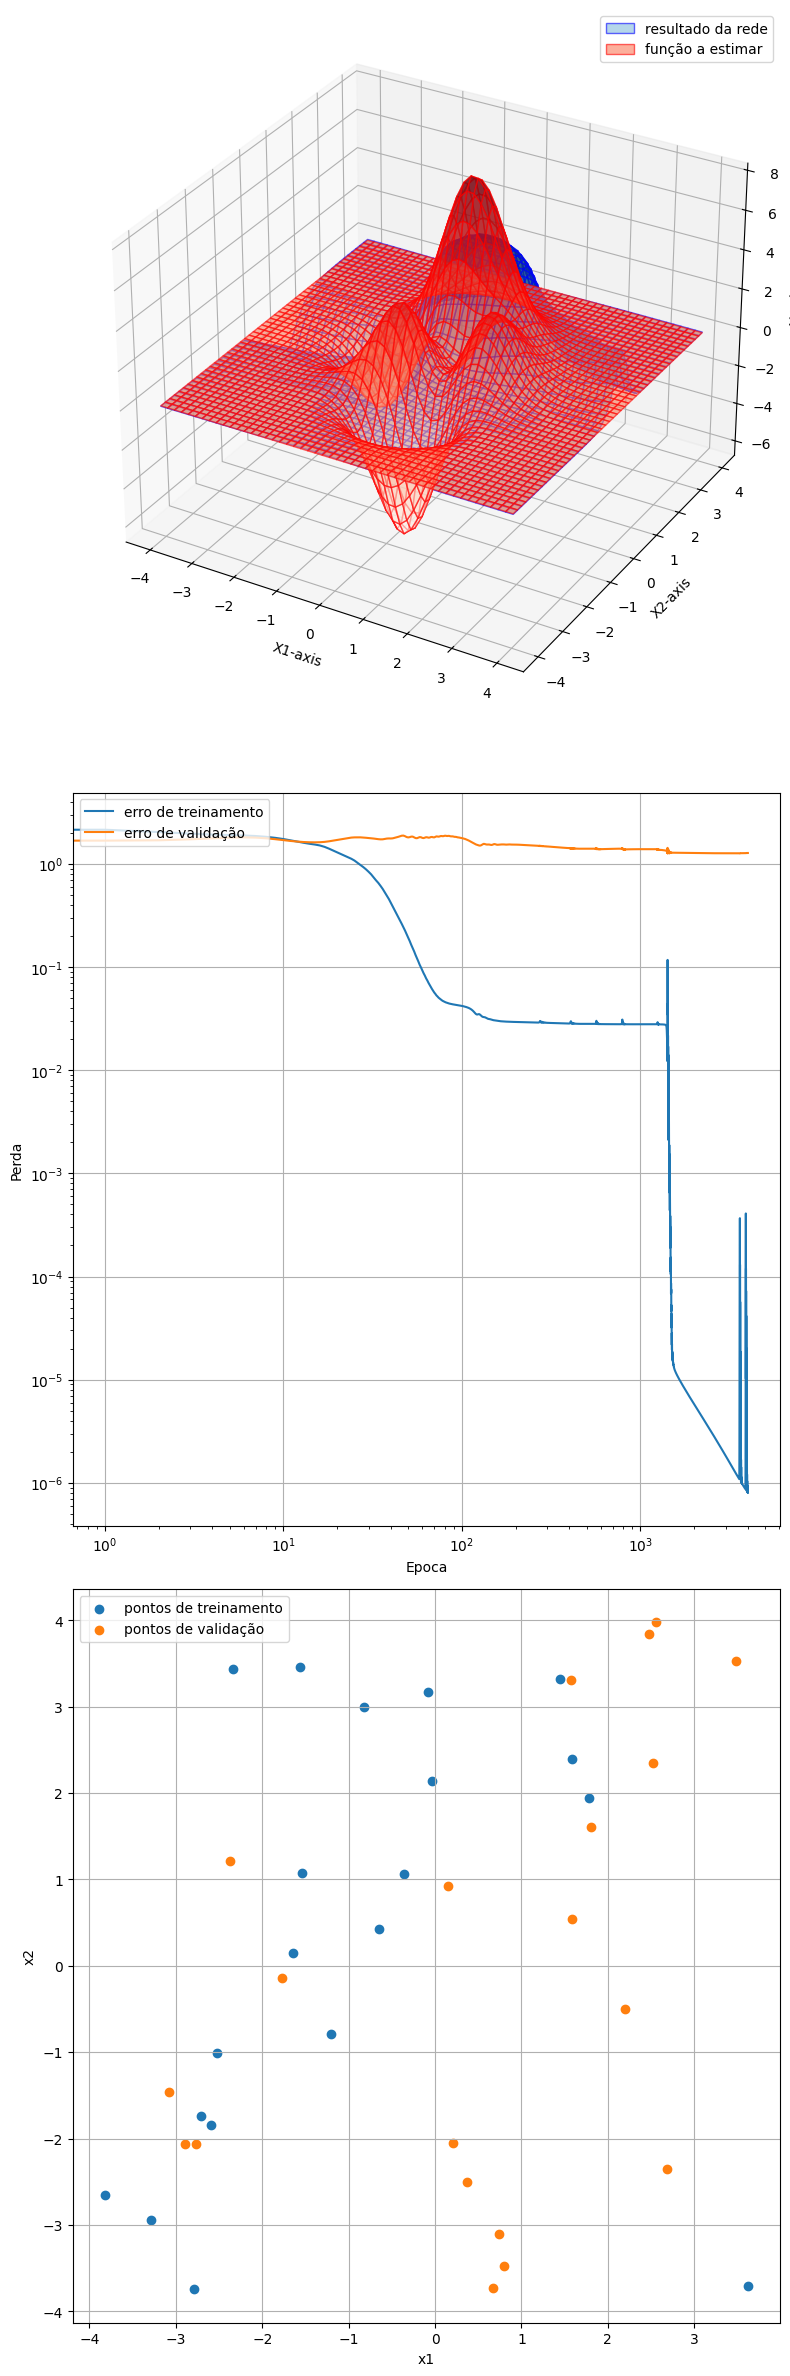

perda estimada = 1.26033616065979


In [5]:
# função de ativação
activation_func = "tanh"

# número de neuronios
neuronios = [30,15,5]

# processamento da rede e plotagem das funções
loss_val_min = tr.processamento_agrupado_2d(rn.neural_net_interno_3_hidden, neuronios, activation_func, x_train, y_train, x_val, y_val, func, xa, xb)

# printando preda mínima dos dados de validação
print(f"perda estimada = {loss_val_min}")